# Projet Final : Python for data analysis 


## Prediction Dataset : Incident management process enriched event

In [51]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import missingno as msno #! pip install missingno
from collections import Counter

In [52]:
import datetime
from datetime import datetime

# Exploration des données 

In [91]:
data=pd.read_csv("incident_event_log.csv")

## Plot des na values

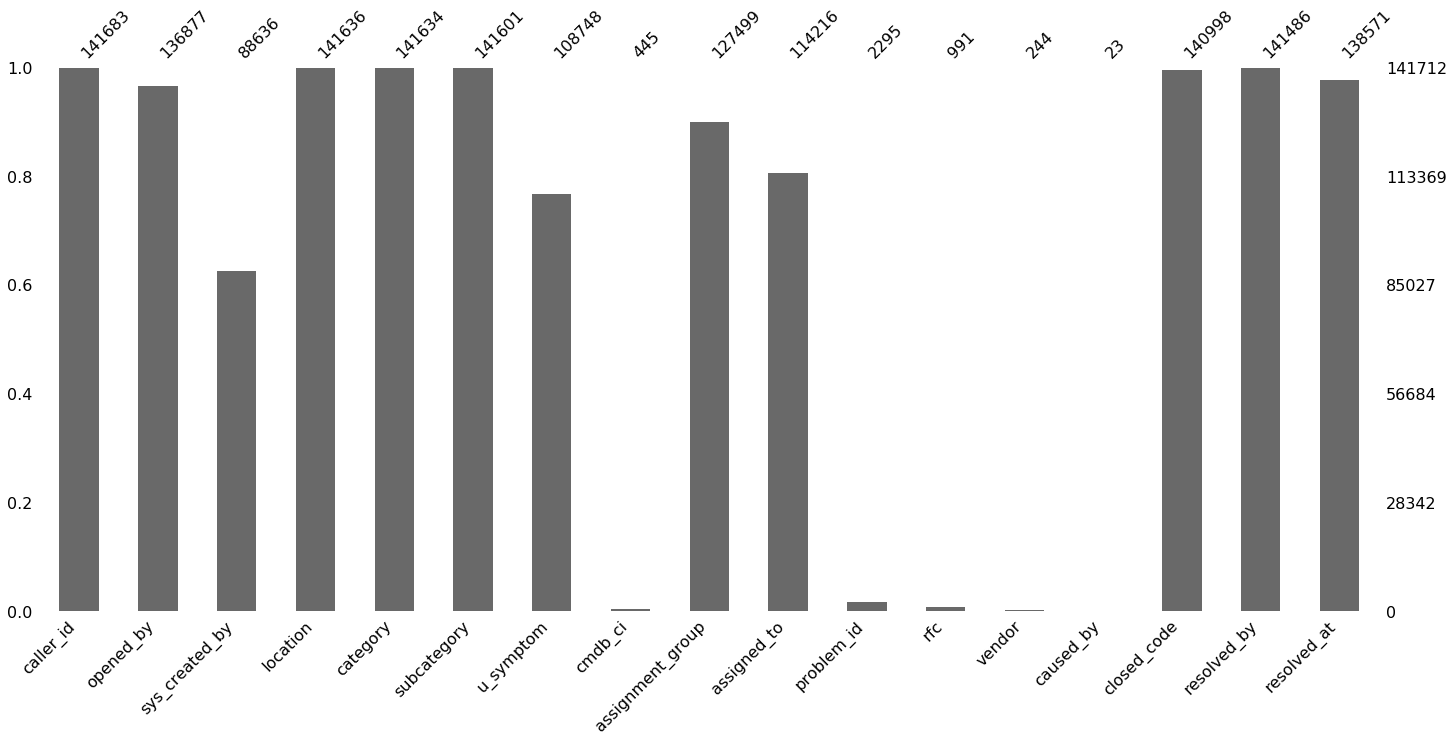

In [161]:
data=data.replace('?', data.replace(['?'], [None]))
datana=data.isna()
colna=[col for col in data if data[col].isna().sum()>0 ]
msno.bar(data[colna])


Il y'a de nombreuses valeures manquantes surtout pour les colonnes : 

- cmdb_ci
- problem_id
- rfc 
- vendor 
- caused_by 

On peut tenter d'afficher une matrice de corrélation pour visualiser les relations entre les variables : 

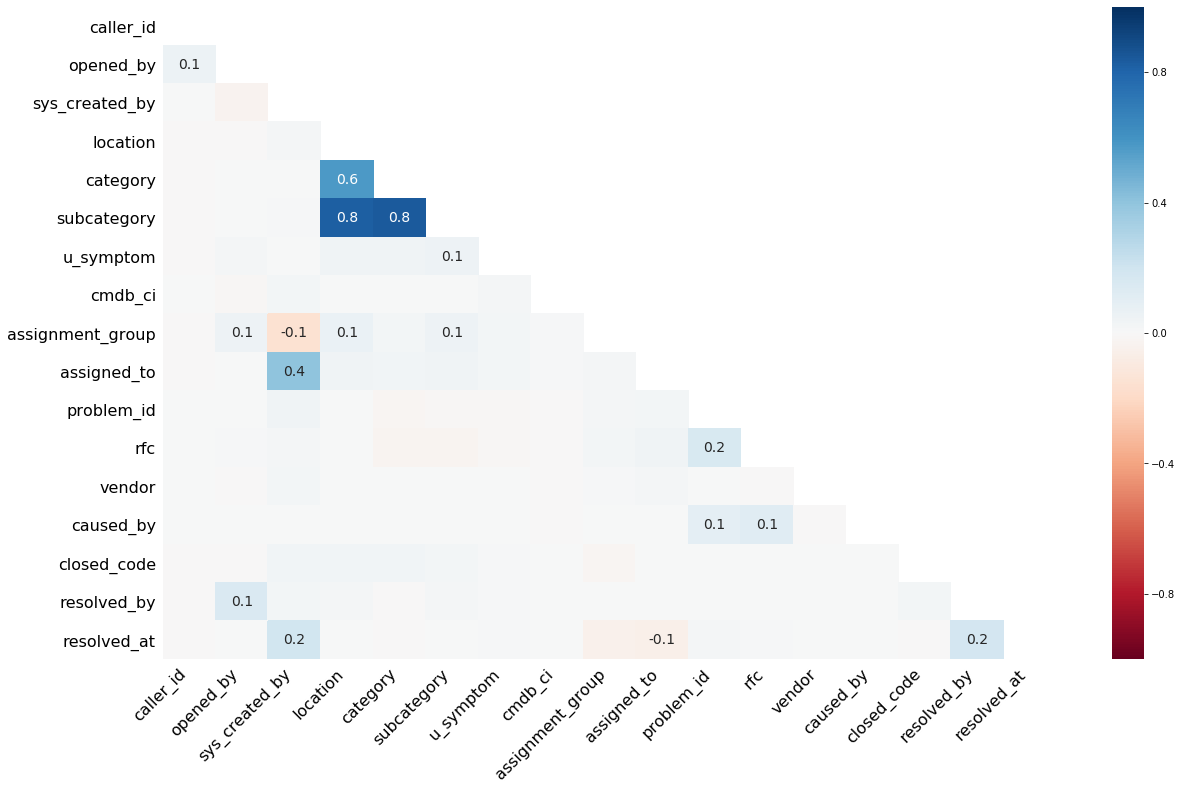

In [162]:
msno.heatmap(data)

On remarque qu'il y'a très peut de corrélations calculés, car il existe de nombreuses colonnes catégorielles.
On peut les afficher grâce à la commande suivante : 

In [171]:
data=pd.read_csv("incident_event_log.csv")

In [172]:
data.dtypes

number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem_id                 object
rfc           

On peut afficher un aperçu du nombre de catégories par type de variables : 

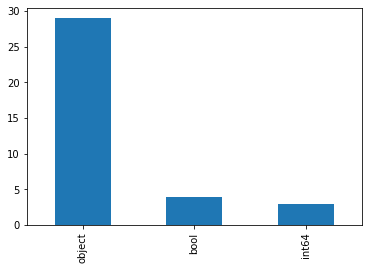

In [173]:
data.dtypes.value_counts().plot(kind='bar')

In [174]:
print("Le nombre de colonnes de type Object est de :",data.dtypes[data.dtypes=='object'].count())

Le nombre de colonnes de type Object est de : 29


#### Astuce 

- Pour pouvoir visualiser l'ensemble des colonnes avec pandas dans un dataset comportant de nombreuses colonnes on peut lancer la commande suivante : 

In [92]:
pd.options.display.max_columns =None


In [175]:
data.head(5)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


# Calcul des colonnes temporelles

Pour pouvoir avoir la target il faut transfermer des colonnes au format datetime et faire la difference entre les colonnes : 

- closed_at
- opened_at

In [176]:
data['closed_at']=data.closed_at.astype(str)
data['closed_at']= [datetime.strptime(x, '%d/%m/%Y %H:%M') for x in data['closed_at']]

data['opened_at']=data.opened_at.astype(str)
data['opened_at']= [datetime.strptime(x, '%d/%m/%Y %H:%M') for x in data['opened_at']]

data['time_completion']=data['closed_at']-data['opened_at']

data['time_completion']=(data['time_completion'].dt.days * 24) + data['time_completion'].dt.seconds / 3600




Pour utiliser pleinement les informations du dataset on peut faire de même avec les variables : 

- sys_created_at
- sys_updated_at 

In [177]:

data['sys_created_at']=data.sys_created_at.astype(str)
data['sys_created_at']= [datetime.strptime(x, '%d/%m/%Y %H:%M') if x!='?' else datetime.now() for x in data['sys_created_at'] ]


data['sys_updated_at']=data.sys_updated_at.astype(str)
data['sys_updated_at']= [datetime.strptime(x, '%d/%m/%Y %H:%M') if x!='?' else datetime.strptime('0/0/0 0:0', '%d/%m/%Y %H:%M') for x in data['sys_updated_at']]
data['time_sys']=data['sys_created_at']-data['sys_updated_at']
data['time_sys']=(data['time_sys'].dt.days * 24) + data['time_sys'].dt.seconds / 3600


Transformation des colonnes binaire en 0 ou 1 : 

In [178]:
data['active']=[ 1 if element==True else 0 for element in data['active']]
data['made_sla']=[ 1 if element==True else 0 for element in data['made_sla']]
data['knowledge']=[1 if element==True else 0 for element in data['knowledge']]
data['u_priority_confirmation']=[1 if element==True else 0 for element in data['u_priority_confirmation']]


## Group By 

Pour la cohérence de la prédiction attendu, il est plus intéressant de regroupé les lignes par incidents : 

In [61]:
dico={'time_completion':lambda a:sum(a)/len(a),'time_sys':lambda a:sum(a)/len(a),'active':min,'reassignment_count':max,'reopen_count':max,'sys_mod_count':max ,'incident_state':lambda a: 'Closed','made_sla':max,'caller_id':max,'opened_by':max,'sys_created_by':max,'contact_type':max,'location':max,'category':max,'subcategory':max,'u_symptom':max,'impact':max,'urgency':max,'priority':max,'assignment_group':max,'knowledge':max,'closed_code':max}
df=data.groupby(['number']).agg(dico)

In [103]:
df.shape

(24918, 22)

On se retrouve désormais avec __24 918__ lignes et __22__ colonnes.

In [104]:
df.head()

,time_completion,time_sys,active,reassignment_count,reopen_count,sys_mod_count,incident_state,made_sla,caller_id,opened_by,sys_created_by,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,knowledge,closed_code
number,,,,,,,,,,,,,,,,,,,,,,
INC0000045,130.733333,-37.054167,0,0,0,4,Closed,1,Caller 2403,Opened by 8,Created by 6,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,1,code 5
INC0000047,149.333333,-27.648148,0,1,0,8,Closed,1,Caller 2403,Opened by 397,Created by 171,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,2 - Medium,2 - Medium,3 - Moderate,Group 70,1,code 5
INC0000057,140.833333,34307.686349,0,0,0,6,Closed,1,Caller 4416,Opened by 8,?,Phone,Location 204,Category 20,Subcategory 125,Symptom 471,2 - Medium,2 - Medium,3 - Moderate,Group 70,1,code 10
INC0000060,174.366667,-69.466667,0,0,0,3,Closed,1,Caller 4491,Opened by 180,Created by 81,Phone,Location 204,Category 9,Subcategory 97,Symptom 450,2 - Medium,2 - Medium,3 - Moderate,Group 25,1,code 3
INC0000062,129.033333,-19.195833,0,1,0,7,Closed,1,Caller 3765,Opened by 180,Created by 81,Phone,Location 93,Category 53,Subcategory 168,Symptom 232,2 - Medium,2 - Medium,3 - Moderate,Group 70,1,code 7


# Data Vizualisation 

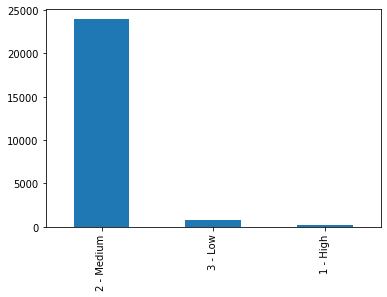

In [180]:

df.impact.value_counts(dropna=False).plot(kind='bar')

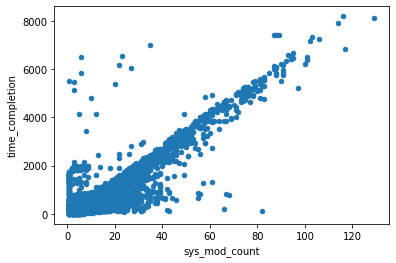

In [181]:

df.plot(kind='scatter',x='sys_mod_count',y='time_completion')

On peut dés à présent remarquer une corrélation entre la variable __sys_mod_count__ et la target : __time_completion__

In [313]:
df.head(10)

,time_completion,time_sys,active,reassignment_count,reopen_count,sys_mod_count,incident_state,made_sla,caller_id,opened_by,sys_created_by,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,knowledge,closed_code
number,,,,,,,,,,,,,,,,,,,,,,
INC0000045,130.733333,-37.054167,0,0,0,4,Closed,1,Caller 2403,Opened by 8,Created by 6,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2,2,2,Group 56,1,code 5
INC0000047,149.333333,-27.648148,0,1,0,8,Closed,1,Caller 2403,Opened by 397,Created by 171,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,2,2,2,Group 70,1,code 5
INC0000057,140.833333,34259.014960,0,0,0,6,Closed,1,Caller 4416,Opened by 8,?,Phone,Location 204,Category 20,Subcategory 125,Symptom 471,2,2,2,Group 70,1,code 10
INC0000060,174.366667,-69.466667,0,0,0,3,Closed,1,Caller 4491,Opened by 180,Created by 81,Phone,Location 204,Category 9,Subcategory 97,Symptom 450,2,2,2,Group 25,1,code 3
INC0000062,129.033333,-19.195833,0,1,0,7,Closed,1,Caller 3765,Opened by 180,Created by 81,Phone,Location 93,Category 53,Subcategory 168,Symptom 232,2,2,2,Group 70,1,code 7
INC0000063,129.866667,-18.552083,0,1,0,7,Closed,1,Caller 2146,Opened by 180,Created by 81,Phone,Location 93,Category 20,Subcategory 125,Symptom 471,2,2,2,Group 70,1,code 7
INC0000064,201.833333,-53.122222,0,1,0,8,Closed,1,Caller 2838,Opened by 131,Created by 62,Phone,Location 143,Category 53,Subcategory 168,Symptom 580,2,2,2,Group 70,1,code 6
INC0000065,176.366667,-25.955128,0,6,0,13,Closed,1,Caller 5323,Opened by 131,Created by 62,Phone,Location 108,Category 45,Subcategory 94,Symptom 580,2,2,2,Group 70,1,code 1
INC0000066,174.950000,-57.970833,0,1,0,3,Closed,1,Caller 3796,Opened by 24,Created by 13,Phone,Location 161,Category 55,Subcategory 185,?,2,2,2,Group 70,1,code 5


In [182]:
colint=['active','reassignment_count','time_sys','reopen_count','sys_mod_count','made_sla','knowledge']
colchar=[ col for col in list(df.columns) if not col in colint]
nbr_var_dif=[len(Counter(df[col])) for col in colchar]
df_nbr_var=pd.DataFrame([nbr_var_dif],columns=colchar)

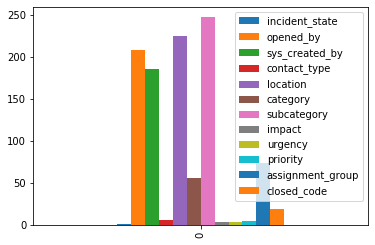

In [183]:
df_nbr_var.loc[:,[col for col in df_nbr_var.columns if col not in ['caller_id','time_completion','u_symptom']]].plot(kind='bar')

On remarque que certaines colonnes on très peu de valeurs catégorielles différentes.


On peut essayer d'afficher seulement celles ayant un nombre de valeures différentes inférieures à 50 : 


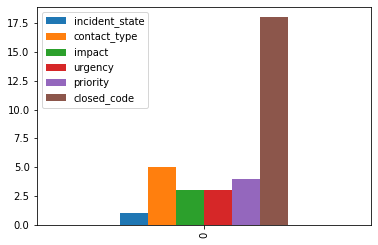

In [184]:
df_nbr_var.loc[:,[col for col in list(df_nbr_var.columns) if int(df_nbr_var[col])<50]].plot(kind='bar')

In [185]:
Counter(df.closed_code)

Counter({'code 5': 677,
         'code 10': 314,
         'code 3': 99,
         'code 7': 4412,
         'code 6': 14882,
         'code 1': 449,
         'code 11': 221,
         'code 8': 831,
         'code 4': 130,
         'code 9': 2489,
         'code 2': 59,
         'code 17': 21,
         'code 16': 171,
         '?': 107,
         'code 15': 43,
         'code 13': 8,
         'code 14': 3,
         'code 12': 2})

Après observation de la colonne closed_code on remarque qu'il n'y a pas d'ordres visibles

En revanche on peut transformer les variables catégorielles suivantes en int : 

- impact
- urgent
- priority

Car celles-ci présentent toutes des relation d'ordre évidentes. 

# Traitement des catégories ordinales 

In [186]:
df.priority=df.priority.replace('4 - Low','1')
df.priority=df.priority.replace('3 - Moderate','2')
df.priority=df.priority.replace('2 - High','3')
df.priority=df.priority.replace('1 - Critical','4')

df.priority=df.priority.astype(int)

df.urgency=df.urgency.replace('3 - Low','1')
df.urgency=df.urgency.replace('2 - Medium','2')
df.urgency=df.urgency.replace('1 - High','3')
df.urgency=df.urgency.astype(int)


df.impact=df.impact.replace('3 - Low','1')
df.impact=df.impact.replace('2 - Medium','2')
df.impact=df.impact.replace('1 - High','3')
df.impact=df.impact.astype(int)

In [188]:
colint=['active','reassignment_count','time_sys','reopen_count','sys_mod_count','made_sla','knowledge','impact','urgency','priority']

# Hot Encoding 

In [236]:
df=hot_encod(df,'opened_by')

In [237]:
df=hot_encod(df,'incident_state')

In [67]:
#df=hot_encod(df,'sys_created_by')

In [238]:
df=hot_encod(df,'contact_type')

In [239]:
df=hot_encod(df,'category')


In [202]:
#df=hot_encod(df,'subcategory')


In [220]:
#df=hot_encod(df,'u_symptom')


In [259]:
df=hot_encod(df,'location')
df=hot_encod(df,'category')
df=hot_encod(df,'subcategory')
df=hot_encod(df,'u_symptom')
df=hot_encod(df,'impact')
df=hot_encod(df,'urgency')
df=hot_encod(df,'priority')
df=hot_encod(df,'assignment_group')
df=hot_encod(df,'closed_code')
df=hot_encod(df,'incident_state')


In [261]:
df=hot_encod(df,'caller_id')


In [47]:
def hot_encod(df,col):
    dfDummies=pd.get_dummies(df[col], prefix = col)
    df = pd.concat([df, dfDummies], axis=1)
    df=df.drop(columns=[col])
    return df
    


In [283]:
df.head()

,time_completion,time_sys,active,reassignment_count,reopen_count,sys_mod_count,incident_state,made_sla,caller_id,opened_by,sys_created_by,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,knowledge,closed_code
number,,,,,,,,,,,,,,,,,,,,,,
INC0000045,130.733333,-37.054167,0,0,0,4,Closed,1,Caller 2403,Opened by 8,Created by 6,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2,2,2,Group 56,1,code 5
INC0000047,149.333333,-27.648148,0,1,0,8,Closed,1,Caller 2403,Opened by 397,Created by 171,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,2,2,2,Group 70,1,code 5
INC0000057,140.833333,34259.014960,0,0,0,6,Closed,1,Caller 4416,Opened by 8,?,Phone,Location 204,Category 20,Subcategory 125,Symptom 471,2,2,2,Group 70,1,code 10
INC0000060,174.366667,-69.466667,0,0,0,3,Closed,1,Caller 4491,Opened by 180,Created by 81,Phone,Location 204,Category 9,Subcategory 97,Symptom 450,2,2,2,Group 25,1,code 3
INC0000062,129.033333,-19.195833,0,1,0,7,Closed,1,Caller 3765,Opened by 180,Created by 81,Phone,Location 93,Category 53,Subcategory 168,Symptom 232,2,2,2,Group 70,1,code 7


In [189]:
a=list(df.columns)

In [190]:
b=[element for element in a if not element in colint ]

# Machine Learning 

In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

X=df.loc[:, [element for element in list(df.columns) if element not in b]]
#X=df.loc[:, colint]
y=df['time_completion']

In [252]:
X.dtypes


time_sys              float64
active                  int64
reassignment_count      int64
reopen_count            int64
sys_mod_count           int64
made_sla                int64
impact                  int64
urgency                 int64
priority                int64
knowledge               int64
dtype: object

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler   = StandardScaler().fit(X_train)
X_train  = scaler.transform(X_train)
X_test   = scaler.transform(X_test)


In [200]:
performances = dict()


In [201]:
X.head(2)

,time_sys,active,reassignment_count,reopen_count,sys_mod_count,made_sla,impact,urgency,priority,knowledge
number,,,,,,,,,,
INC0000045,-37.054167,0,0,0,4,1,2,2,2,1
INC0000047,-27.648148,0,1,0,8,1,2,2,2,1


#### Régression Linéaire

In [202]:
algorithme = LinearRegression().fit(X_train, y_train)
performances[algorithme] = algorithme.score(X_test, y_test)

#### Decision tree regressor

In [205]:
 
from sklearn.tree import DecisionTreeRegressor


algorithme = DecisionTreeRegressor()
algorithme.fit(X_train, y_train)
score = algorithme.score(X_test, y_test)
performances[algorithme] = score


#### Random Forest

In [243]:

from sklearn.ensemble import RandomForestRegressor
#hyperparametres = { 'n_estimators':30 }
hyperparametres={'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 45}
algorithme = RandomForestRegressor(**hyperparametres)
algorithme.fit(X_train,y_train)
#score = get_score(algorithme, X_train, X_test, y_train, y_test)
performances[algorithme] = algorithme.score(X_test, y_test)


#### SVR

In [219]:


from sklearn import svm
algorithme = svm.SVR(kernel='linear')
algorithme.fit(X_train,y_train)
score      = algorithme.score(X_test, y_test)
performances[algorithme] = score


#### Catboost

In [221]:

from catboost import CatBoostRegressor
algorithme = CatBoostRegressor(task_type="CPU")
modele     = algorithme.fit(X_train, y_train)
score      = algorithme.score(X_test, y_test)
performances['catboost'] = score

0:	learn: 505.7347982	total: 12.4ms	remaining: 12.4s
1:	learn: 494.7912559	total: 18.1ms	remaining: 9.04s
2:	learn: 483.6435114	total: 24.7ms	remaining: 8.21s
3:	learn: 472.6968032	total: 30.9ms	remaining: 7.7s
4:	learn: 462.4484722	total: 37.8ms	remaining: 7.51s
5:	learn: 452.3410748	total: 54.1ms	remaining: 8.96s
6:	learn: 442.9689417	total: 64.7ms	remaining: 9.18s
7:	learn: 433.1677976	total: 72.6ms	remaining: 9s
8:	learn: 423.7706226	total: 80.8ms	remaining: 8.9s
9:	learn: 414.9681419	total: 89.4ms	remaining: 8.85s
10:	learn: 406.0336172	total: 95.5ms	remaining: 8.59s
11:	learn: 397.4221669	total: 102ms	remaining: 8.39s
12:	learn: 389.3743007	total: 110ms	remaining: 8.37s
13:	learn: 381.2461318	total: 113ms	remaining: 7.98s
14:	learn: 373.5822972	total: 116ms	remaining: 7.63s
15:	learn: 365.8585473	total: 122ms	remaining: 7.52s
16:	learn: 358.9441098	total: 125ms	remaining: 7.24s
17:	learn: 352.0046025	total: 128ms	remaining: 6.98s
18:	learn: 345.1102994	total: 131ms	remaining: 6.7

181:	learn: 132.6981148	total: 1.22s	remaining: 5.47s
182:	learn: 132.6089180	total: 1.22s	remaining: 5.46s
183:	learn: 132.4381708	total: 1.23s	remaining: 5.45s
184:	learn: 132.2001082	total: 1.24s	remaining: 5.45s
185:	learn: 132.0148534	total: 1.24s	remaining: 5.44s
186:	learn: 131.8681120	total: 1.25s	remaining: 5.44s
187:	learn: 131.7456279	total: 1.25s	remaining: 5.42s
188:	learn: 131.6005469	total: 1.27s	remaining: 5.43s
189:	learn: 131.5250576	total: 1.27s	remaining: 5.41s
190:	learn: 131.2940846	total: 1.27s	remaining: 5.39s
191:	learn: 131.2551068	total: 1.27s	remaining: 5.37s
192:	learn: 131.1625259	total: 1.28s	remaining: 5.34s
193:	learn: 131.1131921	total: 1.28s	remaining: 5.32s
194:	learn: 130.9806278	total: 1.28s	remaining: 5.3s
195:	learn: 130.9510687	total: 1.28s	remaining: 5.27s
196:	learn: 130.7974755	total: 1.29s	remaining: 5.25s
197:	learn: 130.7267724	total: 1.29s	remaining: 5.23s
198:	learn: 130.6802998	total: 1.29s	remaining: 5.21s
199:	learn: 130.5950074	total

338:	learn: 120.6706483	total: 2.01s	remaining: 3.92s
339:	learn: 120.6477068	total: 2.02s	remaining: 3.91s
340:	learn: 120.6327726	total: 2.02s	remaining: 3.9s
341:	learn: 120.5841810	total: 2.03s	remaining: 3.9s
342:	learn: 120.5499079	total: 2.04s	remaining: 3.91s
343:	learn: 120.5212239	total: 2.04s	remaining: 3.9s
344:	learn: 120.4612553	total: 2.05s	remaining: 3.89s
345:	learn: 120.3974057	total: 2.05s	remaining: 3.87s
346:	learn: 120.3870796	total: 2.06s	remaining: 3.87s
347:	learn: 120.3671727	total: 2.06s	remaining: 3.86s
348:	learn: 120.3533556	total: 2.06s	remaining: 3.84s
349:	learn: 120.2980939	total: 2.06s	remaining: 3.83s
350:	learn: 120.2345998	total: 2.07s	remaining: 3.82s
351:	learn: 120.2290556	total: 2.07s	remaining: 3.81s
352:	learn: 120.2076516	total: 2.07s	remaining: 3.8s
353:	learn: 120.1830310	total: 2.08s	remaining: 3.79s
354:	learn: 120.1429946	total: 2.08s	remaining: 3.78s
355:	learn: 120.0827864	total: 2.08s	remaining: 3.77s
356:	learn: 120.0536849	total: 2

493:	learn: 115.6919043	total: 2.8s	remaining: 2.86s
494:	learn: 115.6344970	total: 2.8s	remaining: 2.86s
495:	learn: 115.5403996	total: 2.84s	remaining: 2.88s
496:	learn: 115.5342607	total: 2.87s	remaining: 2.9s
497:	learn: 115.5182834	total: 2.88s	remaining: 2.9s
498:	learn: 115.4874947	total: 2.88s	remaining: 2.9s
499:	learn: 115.4568088	total: 2.89s	remaining: 2.89s
500:	learn: 115.3964389	total: 2.9s	remaining: 2.89s
501:	learn: 115.3334022	total: 2.91s	remaining: 2.89s
502:	learn: 115.2876311	total: 2.92s	remaining: 2.88s
503:	learn: 115.2682824	total: 2.93s	remaining: 2.89s
504:	learn: 115.2530299	total: 2.94s	remaining: 2.88s
505:	learn: 115.2479002	total: 2.95s	remaining: 2.88s
506:	learn: 115.2290063	total: 2.95s	remaining: 2.87s
507:	learn: 115.1465345	total: 2.95s	remaining: 2.86s
508:	learn: 115.1232008	total: 2.96s	remaining: 2.85s
509:	learn: 115.0797185	total: 2.96s	remaining: 2.84s
510:	learn: 115.0259728	total: 2.96s	remaining: 2.83s
511:	learn: 115.0136516	total: 2.9

647:	learn: 110.8099406	total: 3.58s	remaining: 1.95s
648:	learn: 110.7884020	total: 3.61s	remaining: 1.95s
649:	learn: 110.7843485	total: 3.62s	remaining: 1.95s
650:	learn: 110.7043603	total: 3.64s	remaining: 1.95s
651:	learn: 110.6354700	total: 3.65s	remaining: 1.95s
652:	learn: 110.6341432	total: 3.65s	remaining: 1.94s
653:	learn: 110.6328372	total: 3.67s	remaining: 1.94s
654:	learn: 110.6315517	total: 3.67s	remaining: 1.94s
655:	learn: 110.5844930	total: 3.68s	remaining: 1.93s
656:	learn: 110.5766492	total: 3.69s	remaining: 1.93s
657:	learn: 110.5738317	total: 3.69s	remaining: 1.92s
658:	learn: 110.5516245	total: 3.7s	remaining: 1.91s
659:	learn: 110.5344981	total: 3.71s	remaining: 1.91s
660:	learn: 110.5331606	total: 3.71s	remaining: 1.9s
661:	learn: 110.4891726	total: 3.72s	remaining: 1.9s
662:	learn: 110.4715409	total: 3.72s	remaining: 1.89s
663:	learn: 110.4376102	total: 3.73s	remaining: 1.89s
664:	learn: 110.4010348	total: 3.74s	remaining: 1.88s
665:	learn: 110.3866750	total: 

800:	learn: 107.4629977	total: 4.31s	remaining: 1.07s
801:	learn: 107.4234626	total: 4.32s	remaining: 1.06s
802:	learn: 107.4075747	total: 4.32s	remaining: 1.06s
803:	learn: 107.3946015	total: 4.33s	remaining: 1.05s
804:	learn: 107.3740676	total: 4.33s	remaining: 1.05s
805:	learn: 107.3190090	total: 4.34s	remaining: 1.04s
806:	learn: 107.2964752	total: 4.34s	remaining: 1.04s
807:	learn: 107.2774711	total: 4.35s	remaining: 1.03s
808:	learn: 107.2639123	total: 4.35s	remaining: 1.03s
809:	learn: 107.2365428	total: 4.36s	remaining: 1.02s
810:	learn: 107.2182343	total: 4.36s	remaining: 1.01s
811:	learn: 107.2129485	total: 4.36s	remaining: 1.01s
812:	learn: 107.1987144	total: 4.36s	remaining: 1s
813:	learn: 107.1859147	total: 4.37s	remaining: 998ms
814:	learn: 107.1793239	total: 4.37s	remaining: 992ms
815:	learn: 107.1742275	total: 4.37s	remaining: 986ms
816:	learn: 107.1633663	total: 4.38s	remaining: 981ms
817:	learn: 107.1469788	total: 4.38s	remaining: 975ms
818:	learn: 107.0946109	total: 

996:	learn: 103.9848044	total: 5.07s	remaining: 15.3ms
997:	learn: 103.9836441	total: 5.08s	remaining: 10.2ms
998:	learn: 103.9612667	total: 5.09s	remaining: 5.09ms
999:	learn: 103.9491765	total: 5.09s	remaining: 0us


In [244]:
performances

{LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False): 0.82432671090198,
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best'): 0.9060025740619013,
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False): 0.9411882176971654,
 SVR(C=1.0, cache_size=200

## GridSearch sur Random Forest

In [224]:
from sklearn.model_selection import GridSearchCV  #from sklearn.model_selection import GridSearchCV  #

In [239]:
hyperparametres_possibles = {
    'n_estimators'     : [i for i in range(5,80,5)],
    'min_samples_leaf':[1,2,3,4,5],
    'min_samples_split':[2,3,4]
}

grid = GridSearchCV(estimator=RandomForestRegressor(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1, cv=3, verbose=2)

In [240]:
%%time

grid.fit(X_train, y_train)

Fitting 3 folds for each of 225 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:  4.3min finished


CPU times: user 10.5 s, sys: 647 ms, total: 11.2 s
Wall time: 4min 21s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 3, 4, 

In [251]:
#dir(grid)

In [250]:
grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=45,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [242]:
grid.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 45}

## Exporter le modèle 

In [39]:
#from sklearn.externals import joblib
#filename = 'catboost.sav'
#joblib.dump(algorithme, filename)


['catboost.sav']

In [40]:
#filename2 = 'scaler.sav'
#joblib.dump(scaler, filename2)


['scaler.sav']

In [41]:
X.shape

(24918, 10)

In [43]:
scaler2 = joblib.load("scaler.sav")
X = scaler2.transform(X)
lm2 = joblib.load("catboost.sav")


In [44]:
lm2.predict(X)

array([168.81710173, 198.29720387, 184.35132094, ...,  83.71042632,
        79.91975146,  72.7679656 ])